<a href="https://www.kaggle.com/code/priyasarageorge/generative-ai-trends-and-opinion-mining?scriptVersionId=129012129" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/generative-ai-tweets/GenerativeAI tweets.csv


In [28]:
import matplotlib.pyplot as plt

Loading the Generative AI tweets dataset.More Information about this dataset can be found at [https://www.kaggle.com/datasets/arinjaypathak/generative-ai-tweets](http://)

In [29]:
df = pd.read_csv('/kaggle/input/generative-ai-tweets/GenerativeAI tweets.csv', parse_dates=['Datetime'])

Seeing the overall structure of the dataset using df.head()

In [30]:
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2023-04-19 21:27:19+00:00,1648800467206672384,From Studio Gangster to Synthetic Gangster 🎤.....,resembleai
1,1,2023-04-19 21:27:09+00:00,1648800425540476929,Took me some time to find this. I build this #...,devaanparbhoo
2,2,2023-04-19 21:26:57+00:00,1648800376479715328,Mind blowing next wave #generativeai platform...,timreha
3,3,2023-04-19 21:26:49+00:00,1648800341193027584,Open Source Generative AI Image Specialist Sta...,VirtReview
4,4,2023-04-19 21:25:00+00:00,1648799883934203905,Are you an #HR leader considering which future...,FrozeElle


In [31]:
daily_counts = df.set_index('Datetime').resample('D')['Tweet Id'].count()

In [32]:
print(daily_counts)

Datetime
2022-04-21 00:00:00+00:00      2
2022-04-22 00:00:00+00:00      1
2022-04-23 00:00:00+00:00      1
2022-04-24 00:00:00+00:00      1
2022-04-25 00:00:00+00:00      7
                            ... 
2023-04-15 00:00:00+00:00    522
2023-04-16 00:00:00+00:00    531
2023-04-17 00:00:00+00:00    800
2023-04-18 00:00:00+00:00    885
2023-04-19 00:00:00+00:00    886
Freq: D, Name: Tweet Id, Length: 364, dtype: int64


Inorder to find the trend we plot a graph of the frequency of the term "Generative AI" before and after the release of ChatGPT. We can do this by counting the number of tweets containing "#GenerativeAI" per day and then plot the graph.

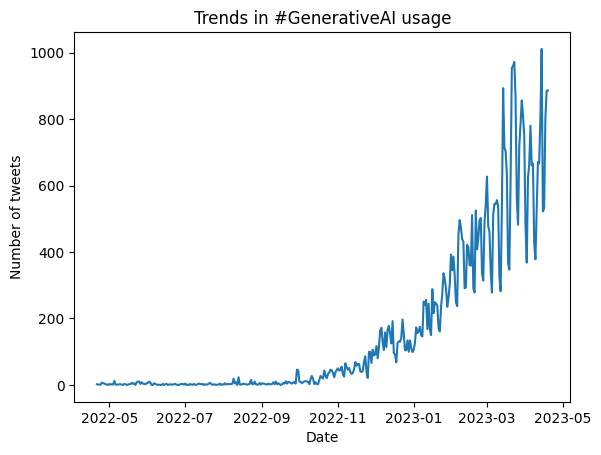

In [33]:
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.title('Trends in #GenerativeAI usage')
plt.show()


Opinion Mining

Here we perform opinion mining on the generative AI tweets,form clusters using K-means clustering, use sentiment analysis to calculate the sentiment score of each tweet and visualise the results

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from transformers import pipeline

In [35]:
sentiment_analysis = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")


In [ ]:
# def preprocess_text(text):
#     text = text.lower()
#     text = re.sub(r'https?://\S+|www\.\S+', '', text)
#     text = re.sub(r'<.*?>', '', text)
#     text = re.sub(r'@\w+', '', text)
#     text = re.sub(r'#\w+', '', text)
#     text = re.sub(r'[^\w\s]', '', text)
#     return text
# df = pd.read_csv('/kaggle/input/generative-ai-tweets/GenerativeAI tweets.csv', parse_dates=['Datetime'])
# df_sample = df.sample(n=100, random_state=42)
# df_sample['clean_text'] = df_sample['Text'].apply(preprocess_text)
# X = vectorizer.fit_transform(df_sample['clean_text'])

Loading the input dataset and choosing random 100 tweets from the sample for ease of training.

In [36]:
df = pd.read_csv('/kaggle/input/generative-ai-tweets/GenerativeAI tweets.csv', parse_dates=['Datetime'])
df_sample = df.sample(n=100, random_state=42)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_sample['Text'])

Clustering the sample tweets into three groups using k-means clustering

In [37]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_sample['cluster'] = kmeans.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
for i in range(3):
    print(f'Cluster {i}:')
    print(df_sample[df_sample['cluster']==i]['Text'].values)
print(df_sample['cluster'].value_counts())


Cluster 0:
['@sirtrollingtonn Here are the images you requested, courtesy of #StableDiffusion.\nPlease retweet &amp; ♥️ if you enjoyed these images. #GenerativeAI, #GenerativeArt, #AIArt, #PromptSharing https://t.co/j5ap17FwAf'
 'If you want to see what AI can do to elevate your #marketing game, check this post out. All text and images were created by #generativeAI. The #creative possibilities are limited only by your imagination! https://t.co/Ncg4xET34z'
 'Why I did not use 2K+ DALL·E free credits \nand donated them to an AI artist\nhttps://t.co/MpjUgnOfLC \n#art #AIart #machinelearning #MLsoGood #artificialintelligence #MLart #GenerativeAI \n#aiartgenerator #AI #VR #iot #Digitalart #generativeart #midjourney #dalle2 #stablediffusion'
 'Kickstarting your day with some purse inspiration. ☕️ 💜\n\nShare your version! 👜\n\nUsing /describe\n1️⃣ Upload the Image\n2️⃣ Select 4 suggested text-prompts\n3️⃣ Try generating new images based on the prompts 👝\n\n#Fashion #AI #LuxuryBags #Generative

Iterating over each tweet in the sample, cluster-wise and calculating the sentiment score.

In [39]:
num_clusters=3
cluster_sentiment_scores = {}
for cluster_label in range(num_clusters):
    cluster_indices = df_sample.loc[df_sample['cluster'] == cluster_label].index
    tweet_sentiment_scores = []
    for index in cluster_indices:
        tweet = df_sample.loc[int(index), 'Text']
        sentiment_score = sentiment_analysis(tweet)[0]["score"]
        tweet_sentiment_scores.append(sentiment_score)
    cluster_sentiment_scores[cluster_label] = sum(tweet_sentiment_scores) / len(tweet_sentiment_scores)

In [40]:
for cluster_label, sentiment_score in cluster_sentiment_scores.items():
    print(f"Cluster {cluster_label}: Average sentiment score = {sentiment_score}")

# Print the number of tweets in each cluster
print(df_sample['cluster'].value_counts())

Cluster 0: Average sentiment score = 0.3546053252436898
Cluster 1: Average sentiment score = 0.4041734771044166
Cluster 2: Average sentiment score = 0.40866299782480514
1    54
2    35
0    11
Name: cluster, dtype: int64


Visualise the average sentiment score of each cluster using MatPlotLib

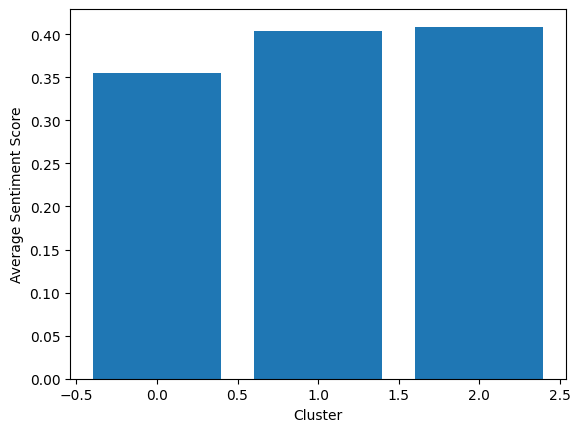

<Figure size 640x480 with 0 Axes>

In [41]:

# Create a list of cluster labels
cluster_labels = list(cluster_sentiment_scores.keys())

# Create a list of average sentiment scores
avg_sentiment_scores = list(cluster_sentiment_scores.values())

# Create a bar plot of the average sentiment scores for each cluster
plt.bar(cluster_labels, avg_sentiment_scores)
plt.xlabel("Cluster")
plt.ylabel("Average Sentiment Score")
plt.show()
plt.savefig('sentiment_score.png')

Determining polarity of the sentiment scores

This method also involves loading the sample tweets,pre-processing the tweets, clustering, calculating the sentiment score,determining polarity i.e whether the tweet is positive, negative or neutral setting a threshold of 0.5 sentiment score ; and visualising the results.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.32, -0.15000000000000002, 0.0625, 0.0, 0.0, -0.20833333333333331, 0.203125, 0.3, 0.04999999999999999, 0.2, 0.3, 0.0, -0.08125, -0.03333333333333333, 0.5, 0.2681818181818182, -0.19999999999999998, 0.4305194805194805, 0.0, 0.13636363636363635, 0.0, -0.6, 0.1, 0.06818181818181818, 0.0, 0.25, 0.05, 0.75, 0.32323232323232326, 0.17012987012987013, 0.06818181818181818, -0.08333333333333333, 0.0, 0.75, 0.13636363636363635]
100 1    54
2    35
0    11
Name: cluster, dtype: int64


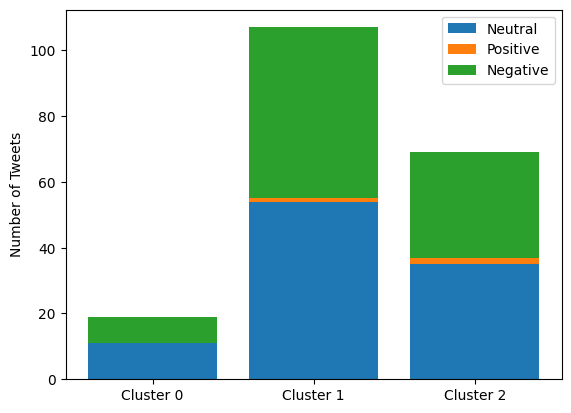

<Figure size 640x480 with 0 Axes>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
import re

# Load data

# Text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text
df = pd.read_csv('/kaggle/input/generative-ai-tweets/GenerativeAI tweets.csv', parse_dates=['Datetime'])
df_sample = df.sample(n=100, random_state=42)
df_sample['clean_text'] = df_sample['Text'].apply(preprocess_text)

# Sentiment analysis
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

df_sample['sentiment_score'] = df_sample['Text'].apply(get_sentiment_score)

# K-means clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df_sample['Text'])

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

df_sample['cluster'] = kmeans.labels_

# Create dictionary of sentiment scores for each cluster
cluster_sentiments = {i: [] for i in range(3)}
for index, row in df_sample.iterrows():
    cluster = row['cluster']
    sentiment_score = row['sentiment_score']
    cluster_sentiments[cluster].append(sentiment_score)
print(cluster_sentiments[2])
print(len(df_sample),df_sample['cluster'].value_counts())
# Create stacked bar chart
fig, ax = plt.subplots()
num_clusters = 3
ax.bar(range(num_clusters), [len(df_sample.loc[df_sample['cluster'] == cluster_label]) for cluster_label in range(num_clusters)], label='Neutral')
ax.bar(range(num_clusters), [sum([score > 0.5 for score in cluster_sentiments[cluster_label]]) for cluster_label in range(num_clusters)], bottom=[len(df_sample.loc[df_sample['cluster'] == cluster_label]) for cluster_label in range(num_clusters)], label='Positive')
ax.bar(range(num_clusters), [sum([score < 0.5 for score in cluster_sentiments[cluster_label]]) for cluster_label in range(num_clusters)], bottom=[len(df_sample.loc[df_sample['cluster'] == cluster_label]) + sum([score > 0.5 for score in cluster_sentiments[cluster_label]]) for cluster_label in range(num_clusters)], label='Negative')
ax.set_ylabel('Number of Tweets')
ax.set_xticks(range(num_clusters))
ax.set_xticklabels(['Cluster {}'.format(i) for i in range(num_clusters)])
ax.legend()
plt.show()
plt.savefig('polarity.png')

Sentiment Distribution:
 Positive    50
Neutral     37
Negative    13
Name: sentiment, dtype: int64

Positive Tweets:
21406    I have many VCs reaching out to me, didn't rea...
971      @josephsirosh, wanted to extend a personal inv...
51689    1. #GenerativeAI is truly an amazing technolog...
31902    With so much hype around #generativeai and #ar...
51982    @sirtrollingtonn Here are the images you reque...
7680     What problems might #generativeAI pose for the...
34127    "How Americans view emerging uses of #AI"\n\n=...
25306    Felix is a orange house cat who has been study...
35120    Here is what #AI thinks of our Tweets! Thank y...
9936     Post of the Day: Christian Schloegel , Chief D...
Name: Text, dtype: object

Negative Tweets:
19825    Breaking, Adobe is entering the generative AI ...
49670    AI can eliminate mundane work like sketching b...
39889    Kognitos @Kognitos_Inc Raises $6.75 Million in...
35970    Disruptive or flawed innovation? #generativeAI...
13653    As 

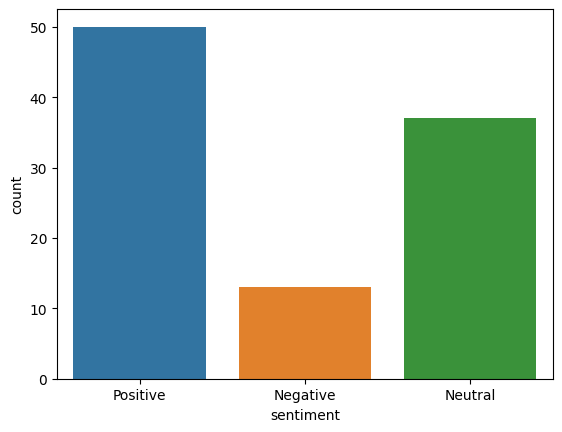

In [43]:
import pandas as pd
import seaborn as sns
from textblob import TextBlob

# Load the tweet dataset

# Define a function to classify sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# Add a new column to the dataframe with the sentiment classification
df_sample["sentiment"] = df_sample["Text"].apply(get_sentiment)

# Print the number of tweets in each category
print("Sentiment Distribution:\n", df_sample["sentiment"].value_counts())

# Print 10 tweets from each category
print("\nPositive Tweets:")
print(df_sample[df_sample["sentiment"] == "Positive"]["Text"].head(10))
print("\nNegative Tweets:")
print(df_sample[df_sample["sentiment"] == "Negative"]["Text"].head(10))
print("\nNeutral Tweets:")
print(df_sample[df_sample["sentiment"] == "Neutral"]["Text"].head(10))

# Visualize the distribution of sentiment
sns.countplot(x="sentiment", data=df_sample)
plt.savefig('blob.png')
